## Proyek Analisis Data: Bike-Sharing-Dataset

- Nama: Eka Pramudianzah
- Email: pramudianzah334@gmail.com
- ID Dicoding: ekapramudianzah

## Menentukan Pertanyaan Bisnis

Sebuah perusahaan yang bergerak di bidang jasa sewa sepeda (sepeda tradisional dan sepeda modern) yang bernama "GowesKuyy" menyediakan sebuah jasa peminjaman sepeda yang di mana seluruh proses peminjaman, keanggotaan, dan pengembalian sepedanya dilakukan secara otomatis. Melalui sistem otomatis ini, customer/peminjam dapat dengan mudah menyewa sepeda dari titik lokasi tertentu dan kembali lagi ke titik posisi lainnya. Dikarenakan minat pasar yang begitu besar terhadap sistem otomatis yang dibuat oleh Perusahaan GowesKuyy, maka sudah terdapat 500 program penyewaan sepeda diseluruh dunia yang mencakup lebih dari 500 sepeda.

Untuk memudahkan dalam membedakan pengguna/peminjam aktif sepeda, Perusahaan GowesKuyy membedakan 2 customer yaitu customer casual yang di mana customer jenis casual tidak terdaftar sebagai anggota sewa sepeda dan customer registered yang merupakan jenis customer yang terdaftar sebagai penyewa sepeda atau dengan kata lain customer registered ini merupakan anggota peminjam sepeda.


Maka dari itu agar proses analisis data dapat lebih terarah, sebagai seorang Data Analyst dari Perusahaan GowesKuyy, saya membuat 3 buah pertanyaan yang diharapkan ketiga pertanyaan ini dapat membuat hasil analisis dapat membuat landasan perusahaan untuk mengambil strategi bisnis. Ketiga pertanyaan bisnis tersebut adalah:

1. Bagaimana tingkat perbandingan tahun peminjaman sepeda (2011 & 2012) berdasarkan jumlah total keseluruhan customer/pengguna sepeda pinjaman (baik jenis customer registered atau customer casual) dalam setiap masing-masing musim?
2. Bagaimanakah perbandingan tingkat frekuensi nilai data berdasarkan jumlah persentase peminjam/pengguna sepeda disaat hari kerja dan hari libur?
3. Bagaimanakah trend data time-series terhadap penggunaan/peminjaman sepeda yang dilakukan oleh kedua jenis customer (customer registered & customer casual) pada periode waktu peminjaman berdasarkan hari kerja (working day) dan hari libur (weekend/holiday)?

## 1. Mempersiapkan semua Library yang Dibutuhkan

Sebelum melakukan proses penyusunan script coding menggunakan Bahasa Pemrograman Python untuk menganalisis data tentang jasa penyewaan sepeda yang disediakan oleh Perusahaan "GowesKuyy", sebagai seorang Data Analyst saya harus mempersiapkan beberapa library yang akan dibutuhkan selama proses analisa berlangsung.

Untuk itu library-library yang akan saya butuhkan diantaranya adalah Pandas, Numpy, Seaborn, dan Matplotlib. Tetapi sebelum melakukan proses deklarasi library, pertama-tama saya akan melakukan proses peng-install'an library yang akan dibutuhkan di dalam projek analisis data kali ini seperti pandas, numpy, seaborn, dll.

In [1]:
# Melakukan proses deklarasi library-library yang akan digunakan selama proses analisis Bike Sharing Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Setelah melakukan proses inisialisasi/pemanggilan library-library yang dibutuhkan, selanjutnya saya akan melakukan tahapan proses Data Wrangling dimana tahapan ini terdiri dari pemanggilan/load dataset ke dalam Notebook file (Gathering Data) yang dimana data tersebut sudah dipersiapkan di dalam local folder. Selain itu juga terdapat proses Assessing Data dan Cleaning Data yang dimana masing-masing sub-tahapan tersebut memiliki tugas yang berbeda.

Tahap Assessing Data berfokus kepada penilaian/pemeriksaan/pengecekan data yang digunakan apakah data tersebut sudah layak untuk dilakukan proses analisis data atau belum. Sedangkan tahap Cleaning Data berfokus kepada pembersihan data sekaligus mentransformasikan data yang memiliki format nilai yang masih salah.

Tetapi sebelum melakukan tahapan Data Wrangling, Data Visualization, dan pengambilan kesimpulan, saya akan melakukan proses ekstraksi semua library/modul/paket-paket yang digunakan di dalam projek kali ini menggunakan sebuah library yang bernama pipreqs. Jadi library pipreqs berfungsi untuk melakukan proses ekstraksi beberapa library yang kita gunakan di dalam suatu projek tertentu dan library-library yang tidak kita gunakan tidak akan diekstrak di dalam file yang bernama requirement.txt. 

Catatan tambahan: Sebenarnya saya ingin mengekstrak library yang hanya digunakan di dalam projek ini saja namun beberapa kali saya coba dan saya cek file requirements.txt tidak ada library yang berhasil ter-export sehingga saya menggunakan cara kedua yaitu mengekstrak/meng-export semua library serta modul python yang telah digunakan dan akan digunakan selama projek analisis data dengan Dataset penggunaan/peminjaman sepeda.

In [2]:
# Mengekstrak semua library-library serta modul Python yang telah digunakan dan akan digunakan di dalam projek analisis data
!pip freeze > requirements.txt

## 2. Data Wrangling

### 2.1. Gathering Data

In [3]:
"""
Melakukan proses pemanggilan file dataset Bike Sharing per Day yang berformat .CSV
(Comma Separated Value) yang telah ditempatkan di dalam local folder
"""
df_bikesharing_per_day = pd.read_csv("Data/day.csv")

df_bikesharing_per_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2.2. Assesing Data

In [4]:
# Menampilkan jumlah baris dan kolom yang terdapat di dalam variabel DataFrame "df_bikesharing_per_day"
print("Jumlah Data dan Kolom dari Variabel DataFrame df_bikesharing_per_day adalah:", df_bikesharing_per_day.shape)

Jumlah Data dan Kolom dari Variabel DataFrame df_bikesharing_per_day adalah: (731, 16)


Berdasarkan output diatas dapat diketahui bahwasanya sebanyak 731 data berada di dalam variabel DataFrame "df_bikesharing_per_day" yang tersebar di 16 kolom berbeda. Masing-masing keenam belas kolom yang dimiliki oleh variabel "df_bikesharing_per_day" diantaranya adalah sebagai berikut:

1. instant
2. dteday
3. season
4. yr
5. mnth
6. holiday
7. weekday
8. workingday
9. weathersit
10. temp
11. atemp
12. hum
13. windspeed
14. casual
15. registered
16. cnt

Setelah mengetahui jumlah data dan jumlah kolom pada variabel DataFrame "df_bikesharing_per_day", selanjutnya saya ingin menampilkan apakah di dalam variabel DataFrame terdapat data yang terduplikasi atau tidak. Untuk itu saya akan memanfaatkan fungsi yang bernama "duplicated()" dan "sum()"

In [5]:
# Menampilkan jumlah data yang terduplikasi pada variabel DataFrame "df_bikesharing_per_day"
print("Jumlah Data Duplikat yang Dimiliki oleh Variabel DataFrame adalah:", df_bikesharing_per_day.duplicated().sum())

Jumlah Data Duplikat yang Dimiliki oleh Variabel DataFrame adalah: 0


Berdasarkan hasil diatas maka diketahui bahwasanya DataFrame "df_bikesharing_per_day" tidak memiliki/tidak terindikasi adanya data duplikat. Sebagai catatan bahwasanya data duplikat merupakan data yang memiliki kesamaan nilai observasi di dalam satu unit baris data yang sama persis diseluruh kolom yang ada.

Jika data duplikat tersebut tidak diketahui maka akan mengacaukan hasil analisis yang akan kita buat sehingga analisis yang sudah dibuat tidak dapat dipercaya karena akan menyebabkan sesatnya hasil wawasan.

Tahap pemeriksaan data selanjutnya adalah menampilkan apakah masing-masing kolom yang ada di dalam variabel DataFrame "df_bikesharing_per_day" memiliki missing value atau tidak. Untuk mengetahuinya saya akan menggunakan fungsi pandas yang bernama "isnull()" serta juga menggunakan bantuan nilai statistic yaitu "sum()". Perlu diketahui bahwasanya missing value/nilai yang hilang adalah data-data yang hilang/tidak tersedia di dalam baris observasi data yang direpresentasikan sebagai nilai NaN (Not a Number) yang biasanya disebabkan adanya human error, proses pengambilan data yang tidak lengkap, dll.

In [6]:
# Mengecek jumlah nilai yang hilang (missing value) pada masing-masing atribut kolom yang dimiliki oleh variabel DataFrame
df_bikesharing_per_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil diatas diketahui bahwasanya DataFrame "df_bikesharing_per_day" tidak memiliki missing value disetiap kolomnya tetapi jika diperhatikan kembali, pada kolom "season", "yr", "mnth", "workingday", "weathersit" terdapat kesalahan format nilai. Karena jika dicek kembali pada file Readme untuk dataset "Bike Sharing", keempat kolom tersebut seharusnya berformat string atau dengan kata lain masing-masing nilai tersebut seharusnya bukanlah angka bilangan bulat melainkan kalimat object. Proses transformasi format data ini akan dilakukan pada tahapan Clearning Data.

Selain pengecekan dengan fungsi "isnull()" dan dibantu dengan method statistik "sum()", pengecekan data selanjutnya adalah saya akan menampilkan nilai statistic descriptive untuk kolom-kolom yang berformat numerik atau dengan kata lain kolom yang memiliki tipe data Integer ataupun Float. Untuk mengecek tipe data pada masing-masing kolom, saya akan menggunakan fungsi pandas yang bernama "dtypes".

In [7]:
# Melakukan proses penilaian/pengecekan tipe data terhadap masing-masing kolom yang dimiliki oleh "df_bikesharing_per_day"
df_bikesharing_per_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Hasil pengecekan diatas diketahui terdapat 3 tipe data berbeda diantaranya adalah Integer, Object/String dan Float. Hasil diatas juga menunjukkan kepada kita bahwasanya tipe data yang dimiliki oleh setiap kolom, beberapa diantaranya masih kurang tepat seperti tipe data untuk kolom "dteday" yang seharusnya adalah Datetime namun teridentifikasi sebagai tipe data Object. Kemudian kolom "season", "yr", "workingday" dan "weathersit" yang seharusnya keempat kolom tersebut merupakan tipe data Object/String tetapi saat ini teridentifikasi sebagai tipe data Integer.

Proses pengecekan selanjutnya adalah mengecek nilai statistic descriptive untuk kolom yang memiliki format nilai numerik atau dengan kata lain setiap kolom yang memiliki tipe data Integer atau Float akan ditampilkan nilai statistic descriptive.

In [8]:
# Menampilkan nilai statistik deskriptif untuk setiap kolom yang memiliki format nilai numerik dengan tipe data Integer/Float
df_bikesharing_per_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil diatas dapat diketahui nilai-nilai statistik dari masing-masing atribut kolom yang memiliki format nilai numerik dengan tipe data yaitu Integer/Float. Masing-masing atribut kolom yang memiliki nilai statistic descriptive diantaranya adalah kolom "instant", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered" dan "cnt".

Sedangkan atribut "dteday" tidak ada dikarenakan kolom tersebut memiliki tipe data Object/String yang mana nilai statistik untuk kolom yang memiliki format selain numerik, nilai statistik yang ditampilkan sangat berbeda dibandingkan nilai statistik untuk format nilai numerik.

Nilai statistik deskriptif diatas memiliki beberapa nilai yang bermacam-macam seperti nilai mean (nilai rata-rata dari suatu kolom), standard deviasi (std), jumlah data (count), nilai minimum (min), nilai maximum (max), nilai quartil 1 (25%), nilai quartil 2 (50% atau biasa yang dikenal sebagai nilai median), dan nilai quartil 3 (75%). Sedangkan untuk nilai statistik deskriptif pada format nilai kategorik adalah jumlah data (count), freq/frekuensi data, unique dan top. Lalu untuk mengetahui informasi yang terkandung di dalam insight diatas, berikut adalah beberapa informasi penting yang dapat kita ambil pada hasil nilai statistik deskriptif untuk atribut kolom yang berformat nilai numerik dari variabel DataFrame "df_bikesharing_per_day":

1. Atribut "temp" diketahui memiliki nilai minimum sebesar 0.059130 (0.06) sedangkan nilai maximum-nya adalah 0.861667 (0.86). Kemudian rata-rata suhu/average temperature berada di nilai 0.495385 (0.49) dengan nilai standard deviasi sebesar 0.183051 (0.18). Selain keempat nilai statistik tersebut (minimum, maximum, mean/average dan standard deviasi), numerik memiliki nilai statistik lainnya yaitu quartil. Quartil 1 (Q1 atau 25%) pada atribut "temp" adalah 0.337083 (0.34), quartil 2 atau yang dikenal juga sebagai nilai median (Q2 atau 50%) pada atribut kolom "temp" adalah 0.498333 (0.50), sedangkan quartil 3 (Q3 atau 75%) pada kolom "temp" yakni 0.655417 (0.66).

2. Informasi kedua diambil dari atribut kolom "mnth" yang memiliki nilai minimum yakni 1 sedangkan nilai maximumnya adalah 12. Lalu untuk nilai rata-rata pada kolom "mnth" adalah 6.519836 (6.52) dan nilai standard deviasi yakni sebesar 3.451913 (3.45). Tiga nilai statistik deskriptif terakhir pada atribut kolom "mnth" adalah nilai quartil 1 (Q1 atau 25%) adalah 4, nilai tengah/median pada kolom "mnth" di dalam statistic descriptive (Q2 atau 50%) adalah 7, dan nilai quartil 3 (75%) adalah 10.

3. Informasi selanjutnya berasal dari atribut kolom "casual" yang ternyata jumlah customer/pengguna/peminjam sepeda yang tidak terdaftar (casual user) dan telah tercatat di dalam sistem otomatis milik Perusahaan GowesKuyy hanya ada 2 pengguna saja sedangkan jumlah maksimum pengguna casual mencapai 3.410. Lalu untuk rata-rata pengguna casual sepeda yang meminjam sepeda di Perusahaan GowesKuyy mencapai 848 (848.176471) dengan nilai standard deviasi sebesar 686 (686.622488). Selain keempat nilai statistik tersebut (minimum, maximum, mean/average dan standard deviasi), sama seperti 2 atribut kolom sebelumnya, atribut "casual" juga memiliki nilai statistik lainnya yaitu quartil. Quartil 1 (Q1 atau 25%) pada atribut "casual" adalah 315.500000 (315.50), quartil 2 atau yang dikenal juga sebagai nilai median (Q2 atau 50%) pada atribut kolom "casual" adalah 713.000000 (713.00), sedangkan quartil 3 (Q3 atau 75%) pada kolom "casual" adalah 1096.000000 (1096.00).

In [9]:
# Menampilkan seluruh informasi yang terdapat di dalam variabel DataFrame "df_bikesharing_per_day"
df_bikesharing_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil output diatas, kita mendapatkan insight baru yang sebetulnya merupakan hasil insight yang sudah dilakukan sebelumnya menggunakan fungsi "dtypes", "isnull()" menggunakan method "sum()" serta fungsi "shape()". Tujuan dari fungsi "info()" dari Library Pandas adalah supaya kita dapat mengetahui secara cepat dan ringkas beberapa informasi terpisah dari DataFrame yang kita gunakan agar dapat menilai apakah DataFrame yang kita gunakan sudah layak untuk dilakukan proses analisis data atau belum.

Jika diperhatikan kembali, DataFrame yang saya gunakan untuk analisis saat ini sebenarnya tidak ada hal yang aneh seperti missing values/data yang terduplikasi ataupun outlier namun beberapa atribut kolom mendapatkan kesalahan berupa format nilai yang masih belum tepat serta terdapat atribut kolom yang sebenarnya tidak dibutuhkan sehingga ketika kolom tersebut dihapus, kolom tersebut tidak mempengaruhi hal apapun di dalam observasi data.

Maka dari itu tahap selanjutnya adalah saya akan melakukan proses Cleaning Data yang didalamnya terdapat tahapan transformasi data dan menghapus kolom yang tidak dibutuhkan. Transformasi data merupakan sebuah tahap dari bagian Data Preprocessing yang bertugas untuk mengubah/mentransformasikan nilai data dari format nilai yang salah menjadi format nilai yang tepat. Selain itu, pada proses Cleaning Data saya juga akan melakukan proses Renaming Column agar pembacaan atribut kolom menjadi memudahkan pembaca karena saat ini penamaan kolom yang dimiliki oleh setiap atribut kolom menurut saya pribadi masih belum tepat sehingga dapat masih dapat diperbaiki.

### 2.3. Cleaning Data

In [10]:
# Menampilkan 14 data teratas yang dimiliki oleh DataFrame "df_bikesharing_per_day"
df_bikesharing_per_day.head(14)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Karena pada dataset yang digunakan saat ini tidak memiliki data duplikat/missing values, jadi di dalam tahapan Data Cleaning saya akan melakukan proses perubahan/transformasi nilai yang teridentifikasi sebagai invalid value. Beberapa atribut yang diketahui memiliki format nilai yang tidak sesuai dengan ketentuan/background dari file Readme.txt diantaranya adalah kolom "season", "yr", "workingday" dan "weathersit".

Selain melakukan proses perubahan format nilai yang teridentifikasi sebagai invalid value, di dalam tahapan Data Cleaning saya juga akan melakukan proses menghilangkan/menghapus atribut kolom yang tidak dibutuhkan selama proses analisis data yaitu kolom "instant". Hal tersebut dikarenakan eksistensi dari kolom "instant" sudah terwakilkan dengan adanya indeks DataFrame.

Kemudian saya juga akan melakukan proses perubahan nama kolom menjadi format yang lebih baik dari kondisi penamaan kolom saat ini serta juga akan melakukan proses transformasi tipe data pada atribut kolom "dteday" dari yang semula ditulis dengan format Object/String menjadi tipe data Datetime. 

In [11]:
# Menghapus kolom "instant" dari observasi atribut dataset yang ada di dalam variabel DataFrame "df_bikesharing_per_day"
df_bikesharing_per_day = df_bikesharing_per_day.drop(["instant"], axis=1)

df_bikesharing_per_day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Hasil diatas menunjukkan bahwasanya saya telah berhasil menghapus atribut kolom "instant" yang sebelumnya dimiliki oleh dataset Bike Sharing per Day yang saat ini disimpan di dalam variabel "df_bikesharing_per_day". Tahap selanjutnya adalah saya akan melakukan proses perubahan nama kolom menjadi format nama yang sesuai dan agar audience yang membaca hasil analisis tersebut dapat dengan mudah mengidentifikasi masing-masing atribut kolom.

Format nama kolom yang akan saya gunakan adalah format dimana setiap karakter pertama pada setiap atribut kolom ditulis menggunakan huruf kapital dan huruf setelahnya ditulis menggunakan huruf kecil. Sebagai contoh kolom "season" akan berubah menjadi "Season".

In [12]:
"""
Melakukan proses perubahan nama kolom pada setiap kolom yang ada di dalam DataFrame menggunakan 2 cara:
Cara pertama adalah saya menginisialisasikan nama kolom untuk setiap kolom yang ditulis dengan singkatan;
Cara kedua adalah saya mengubah nama kolom menjadi format dengan kondisi setiap karakter/huruf pertama
pada setiap atribut kolom ditulis menggunakan huruf besar dan huruf setelahnya ditulis menggunakan huruf kecil
"""
df_bikesharing_per_day = df_bikesharing_per_day.rename(columns={"dteday": "rental_date", "yr": "year",
                                                                "mnth": "month", "workingday": "Working_Day",
                                                                "weathersit": "weather", "temp": "temperature",
                                                                "atemp": "average_temperature",
                                                                "hum": "humidity", "cnt": "total"}) # Cara pertama

df_bikesharing_per_day = df_bikesharing_per_day.rename(str.title, axis=1) # Cara kedua

df_bikesharing_per_day.tail(7) # Menampilkan 7 data terakhir yang dimiliki oleh DataFrame "df_bikesharing_per_day"

,Rental_Date,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temperature,Average_Temperature,Humidity,Windspeed,Casual,Registered,Total
724,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Berdasarkan hasil output diatas dapat diketahui bahwasanya mengubah format penamaan kolom menjadi format sesuai telah berhasil dilakukan menggunakan 2 cara. Cara pertama adalah saya mengubahnya berdasarkan inisialisasi nama kolom yang saya inginkan. Hal ini ditujukan kepada atribut kolom yang sebelumnya ditulis menggunakan format singkatan seperti "yr", "mnth", dll.

Sedangkan cara yang kedua adalah mengubah format penamaan untuk semua atribut kolom yang tersedia di dalam DataFrame. Format yang digunakan pada cara yang kedua ini adalah dengan mengubah setiap huruf pertama pada masing-masing kolom akan ditulis menggunakan huruf besar dan huruf setelahnya ditulis menggunakan huruf kecil. Jika terdapat simbol/karakter pemisah maka nama setelah simbol pemisah tersebut tetap termasuk ke dalam cara kedua yaitu huruf setelah simbol pemisah akan ditulis dengan huruf besar sedangkan huruf setelahnya akan ditulis menggunakan huruf kecil. Hal ini terjadi kepada atribut kolom "Rental_Date" dan "Average_Temperature".

Setelah selesai melakukan proses perubahan format penamaan kolom serta juga sebelumnya telah menghapus atribut kolom yang tidak diperlukan, proses Data Cleaning selanjutnya adalah mentransformasikan nilai data dari format nilai yang salah menjadi format nilai yang tepat (invalid value)

In [13]:
print(df_bikesharing_per_day["Season"].value_counts(), "\n")

print(df_bikesharing_per_day["Year"].value_counts(), "\n")

print(df_bikesharing_per_day["Working_Day"].value_counts(), "\n")

print(df_bikesharing_per_day["Weather"].value_counts(), "\n")

3    188
2    184
1    181
4    178
Name: Season, dtype: int64 

1    366
0    365
Name: Year, dtype: int64 

1    500
0    231
Name: Working_Day, dtype: int64 

1    463
2    247
3     21
Name: Weather, dtype: int64 



In [14]:
# Mentransformasikan nilai-nilai data yang memiliki kesalahan format (invalid value)
def transforming_invalid_value(df_bikesharing_per_day):
    df_bikesharing_per_day["Season"] = df_bikesharing_per_day["Season"].replace([1, 2, 3, 4], ["Springer", "Summer",
                                                                                               "Fall", "Winter"])
    
    df_bikesharing_per_day["Year"] = df_bikesharing_per_day["Year"].replace([0, 1], [2011, 2012])
    
    df_bikesharing_per_day["Working_Day"] = df_bikesharing_per_day["Working_Day"].replace([0, 1],
                                                                                       ["Weekend/Holiday", "Working Day"])
    
    df_bikesharing_per_day["Weather"] = df_bikesharing_per_day["Weather"].replace(
        [1, 2, 3, 4], ["Clear, Few Clouds, Partly Cloudy, Partly Cloudy",
                       "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                       "Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds",
                       "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"])
    
    return transforming_invalid_value

transforming_invalid_value(df_bikesharing_per_day)

df_bikesharing_per_day.tail(25) # Menampilkan 25 data terakhir yang dimiliki oleh variabel DataFrame "df_bikesharing_per_day"

,Rental_Date,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temperature,Average_Temperature,Humidity,Windspeed,Casual,Registered,Total
706,2012-12-07,Winter,2012,12,0,5,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.320833,0.321958,0.764167,0.130600,349,4659,5008
707,2012-12-08,Winter,2012,12,0,6,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.381667,0.389508,0.911250,0.101379,1153,4429,5582
708,2012-12-09,Winter,2012,12,0,0,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.384167,0.390146,0.905417,0.157975,441,2787,3228
709,2012-12-10,Winter,2012,12,0,1,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.435833,0.435575,0.925000,0.190308,329,4841,5170
710,2012-12-11,Winter,2012,12,0,2,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.353333,0.338363,0.596667,0.296037,282,5219,5501
711,2012-12-12,Winter,2012,12,0,3,Working Day,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.297500,0.297338,0.538333,0.162937,310,5009,5319
712,2012-12-13,Winter,2012,12,0,4,Working Day,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.295833,0.294188,0.485833,0.174129,425,5107,5532
713,2012-12-14,Winter,2012,12,0,5,Working Day,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.281667,0.294192,0.642917,0.131229,429,5182,5611
714,2012-12-15,Winter,2012,12,0,6,Weekend/Holiday,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.324167,0.338383,0.650417,0.106350,767,4280,5047
715,2012-12-16,Winter,2012,12,0,0,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.362500,0.369938,0.838750,0.100742,538,3248,3786


Berdasarkan hasil diatas menunjukkan bahwasanya saya telah berhasil dalam mentransformasikan nilai sekaligus tipe data pada beberapa atribut kolom yang sebelumnya memiliki format nilai yang salah (invalid value) seperti atribut "Sesaon", "Year", "Working_Day" dan "Weather". Namun ternyata pada atribut "Season" terdapat kesalahan dalam memberikan nilai di salah satu nilai data yaitu Springer karena seharusnya nilai yang tepat adalah Spring bukan Springer. Maka dari itu sebelum saya melakukan proses transformasi nilai dan tipe data untuk atribut "Rental_Date" saya akan terlebih dahulu mengubah format nilai tersebut dari yang semula Springer menjadi Spring.

In [15]:
# Melakukan proses perubahan nilai pada atribut kolom "Season" dari yang semula Springer menjadi Spring
df_bikesharing_per_day["Season"] = df_bikesharing_per_day["Season"].replace("Springer", "Spring")

df_bikesharing_per_day["Season"].value_counts()

Fall      188
Summer    184
Spring    181
Winter    178
Name: Season, dtype: int64

Transformasi data terakhir yang akan saya lakukan di dalam tahapan Data Cleaning adalah mengubah tipe data sekaligus format nilai pada kolom "Rental_Date" dari yang semula ditulis dengan format Object/String menjadi format Datetime. Selain proses tersebut, saya juga akan memisahkan data tanggal yang dimiliki oleh kolom "Rental_Date" dan ditempatkan di dalam kolom baru.

Hal tersebut dilakukan agar Perusahaan GowesKuyy dapat melihat trend kenaikan/penurunan jumlah peminjam sepeda yang menggunakan/memanfaatkan jasa penyewaan sepeda yang telah dilakukan oleh Perusahaan GowesKuyy selama 2 tahun (2011 s/d 2012) di setiap harinya. Untuk itu dalam melakukan proses transformasi ini, saya akan menggunakan fungsi "to_datetime()" yang telah disediakan oleh Library Pandas.

In [16]:
"""
Mengubah tipe data pada atribut kolom "Rental_Date" dari yang semula memiliki tipe data Object/String
menjadi tipe data Datetime serta kolom "Month" dari yang semula integer menjadi Object agar sesuai dengan format
atribut keterangan waktu yang mana pada dasarnya atribut kolom "Rental_Date" menunjukkan
waktu penyewaan sepeda yang dilakukan oleh masing-masing peminjam serta atribut "Month" akan jauh lebih mudah diketahui
jika nilai datanya bersifat String
"""
df_bikesharing_per_day["Rental_Date"] = pd.to_datetime(df_bikesharing_per_day["Rental_Date"])

"""
Membuat kolom baru yang bernama "Rental_Day" dengan cara mengambil nilai/data tanggal dari kolom
"Rental_Date" yang saat ini sudah memiliki format nilai yang sesuai karena bertipe data Datetime
"""
df_bikesharing_per_day["Rental_Day"] = df_bikesharing_per_day["Rental_Date"].dt.day
df_bikesharing_per_day["Month"] = pd.to_datetime(df_bikesharing_per_day["Month"], format="%m").dt.strftime("%B")

df_bikesharing_per_day.head(4) # Menampilkan 4 data teratas dari Dataset Bike Sharing

,Rental_Date,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temperature,Average_Temperature,Humidity,Windspeed,Casual,Registered,Total,Rental_Day
0,2011-01-01,Spring,2011,January,0,6,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2011-01-02,Spring,2011,January,0,0,Weekend/Holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,2011-01-03,Spring,2011,January,0,1,Working Day,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,2011-01-04,Spring,2011,January,0,2,Working Day,"Clear, Few Clouds, Partly Cloudy, Partly Cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562,4


## 3. Exploratory Data Analysis (EDA)

### 3.1. Explore Jumlah Frekuensi Data Terbanyak dari Atribut "Season"

In [17]:
# Menampilkan Jumlah frekuensi/kemunculan data terbanyak dari atribut kolom "Season"
df_bikesharing_per_day["Season"].value_counts().sort_values(ascending=False)

Fall      188
Summer    184
Spring    181
Winter    178
Name: Season, dtype: int64

Hasil diatas tercatat bahwasanya musim yang paling sering muncul di dalam atribut kolom "Season" pada dataset Bike Sharing adalah musim gugur dengan jumlah kemunculan nilai sebanyak 188 kali. Hal ini menurut saya sangat wajar karena musim gugur merupakan musim yang paling cocok dan tepat untuk bersepeda santai sehingga para masyarakat yang ingin bersantai namun tetap menyehatkan adalah dengan cara bersepeda. Selain itu alasan lainnya mengapa musim gugur (fall season) menurut saya cocok untuk bersepeda santai adalah dikarenakan musim gugur terletak sesudah musim panas (summer season).

Insight selanjutnya yang dapat kita ambil adalah ternyata musim dingin (winter season) cukup sering digunakan oleh masyarakat dalam mengendarai sepeda karena jumlah kemunculan/frekuensi nilai data untuk musim dingin adalah 178 kali. Itu berarti sebanyak 178 kali nilai "Winter" di dalam atribut "Season" selalu muncul pada observasi baris data.

### 3.2. Explore Jumlah Total, Standar Deviasi serta Rata-Rata Pengguna Sepeda berdasarkan Tahun Peminjaman

In [18]:
"""
Menampilkan jumlah total dari masing-masing total pengguna/peminjam sepeda,
baik peminjam casual & peminjam registered, serta nilai
rata-rata dan standar deviasi yang berfungsi untuk melihat
seberapa jauh/dekatnya nilai data dengan nilai rata-rata berdasarkan tahun penyewaan sepeda
"""
df_bikesharing_per_day.groupby("Year").agg({"Casual": ["sum", "mean", "std"],
                                            "Registered": ["sum", "mean", "std"]})

Casual                          Registered                          
         sum         mean         std        sum         mean          std
Year                                                                      
2011  247252   677.402740  556.269121     995851  2728.358904  1060.110413
2012  372765  1018.483607  758.989897    1676811  4581.450820  1424.331846

Berdasarkan hasil diatas, pada tahun 2011 jumlah pengguna sepeda dengan tipe pengguna casual (pengguna/peminjam sepeda yang tidak terdaftar di dalam sistem otomatis) mencapai 247.252. Lalu di tahun selanjutnya (tahun 2012) dengan tipe pengguna yang sama (casual user), jumlah penggunanya mengalami kenaikan dengan nilai total yang mencapai 372.765.

Lalu di tahun 2011 dengan tipe pengguna terdaftar (registered user), jumlah penggunanya mengalami kenaikan yang mencapai kurang lebih hampir 2x lipat dari jumlah casual user di tahun yang sama (tahun 2011) dengan nilai total yang mencapai 995.851. Sedangkan pada tahun 2012, jumlah user yang berhasil terdaftar di dalam sistem otomatis mencapai 1.676.811 pengguna.

Jadi dengan kata lain, tahun 2012 merupakan tahun yang dimana selalu mengalami kenaikan jumlah pengguna/peminjam sepeda dari kedua tipe pengguna (casual maupun registered user). Trend seperti ini menurut saya sudah sangat bagus dengan artian bahwasanya dari sisi bisnis, tahun 2012 dapat melakukan improvisasi dalam hal bisnis terutama dalam meningkatkan jumlah peminjam.

### 3.3 Explore Jumlah Keseluruhan Pengguna Sepeda berdasarkan Bulan Peminjaman dan Musimnya

In [19]:
"""
Menampilkan jumlah total keseluruhan pengguna/peminjam sepeda, baik dari tipe customer casual maupun
customer registered, berdasarkan musim (musim semi, musim panas, dll) dan bulan (Januari, Februari, Maret, dst)
"""
pivot_table_by_month_and_season = pd.pivot_table(df_bikesharing_per_day, values="Total",
                                                index=["Month", "Season"], aggfunc="sum")

sorted_pivot_table = pivot_table_by_month_and_season.sort_values(by=["Total"], ascending=False)

sorted_pivot_table

,,Total
Month,Season,
August,Fall,351194
July,Fall,344948
May,Summer,331686
October,Winter,322352
April,Summer,269094
November,Winter,254831
September,Fall,249599
June,Summer,230954
December,Winter,168038


Berdasarkan hasil output diatas diketahui bahwa pada musim gugur (fall/autumn season), tepatnya musim gugur di bulan ketiga (Agustus) memiliki jumlah pengguna/jumlah peminjam terbanyak dibandingkan bulan yang memiliki musim gugur lainnya seperti Bulan Juni, Juli dan September. Disamping itu, jumlah pengguna pada bulan Agustus juga memiliki jumlah pengguna/peminjam terbanyak dibandingkan bulan-bulan lainnya dengan nilai total mencapai 351.194.

Selain musim gugur pada Bulan Agustus yang memiliki jumlah pengguna paling banyak dibandingkan bulan-bulan lainnya, ternyata musim gugur yang terjadi pada Bulan Juli juga memiliki jumlah pengguna terbanyak kedua dengan total peminjam sebanyak 344.948 sehingga terdapat selisih total mencapai 6.246 pengguna. Ini berarti musim gugur merupakan musim yang paling banyak diminati oleh customer Perusahaan GowesKuyy untuk melakukan aktivitas outdoor dengan cara bersepeda atau dengan kata lain musim gugur adalah musim yang paling tepat untuk melakukan aktivitas bersepeda santai.

Di lain sisi, pada musim semi (spring season) yang terjadi pada Bulan Desember/bulan kedua belas ternyata memiliki jumlah pengguna/peminjam sepeda paling sedikit diantara bulan-bulan yang lain yakni hanya 42.998 saja. Bahkan jumlah tersebut tidak mencapai 45.000/50.000 pengguna sepeda. Hal ini menunjukkan bahwasanya minat customer dalam melakukan aktivitas bersepeda tidak menunjukkan ketertarikan sehingga jumlah peminjam yang cenderung sedikit.

### 3.4. Explore Nilai Rata-Rata, Maximum, Minimum dan Total Keseluruhan terhadap Temperatur Suhu, Kelembapan serta Kecepatan Angin berdasarkan Pengelompokkan Cuaca

In [20]:
"""
Membuat pengelompokkan berdasarkan kategori cuaca untuk melihat jumlah total, nilai rata-rata,
maksimum dan minimum terhadap temperatur suhu, kelembapan suhu udara dan kecepatan angin
"""
df_bikesharing_per_day.groupby("Weather").agg({"Temperature": ["sum", "mean", "max", "min"],
                                               "Humidity": ["sum", "mean", "max", "min"],
                                               "Windspeed": ["sum", "mean", "max", "min"]})

Temperature            \
                                                           sum      mean   
Weather                                                                    
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     236.843696  0.511541   
Light Snow, Light Rain + Thunderstorm + Scatter...    9.102243  0.433440   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  116.180341  0.470366   

                                                                       \
                                                         max      min   
Weather                                                                 
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     0.861667  0.05913   
Light Snow, Light Rain + Thunderstorm + Scatter...  0.633913  0.21750   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.815000  0.10750   

                                                      Humidity            \
                                                           sum      mean   
Weather                                                                    
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     261.870203  0.565594   
Light Snow, Light Rain + Thunderstorm + Scatter...   17.826322  0.848872   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  179.294035  0.725887   

                                                                        \
                                                         max       min   
Weather                                                                  
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     0.835833  0.187917   
Light Snow, Light Rain + Thunderstorm + Scatter...  0.970417  0.000000   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.972500  0.407083   

                                                    Windspeed            \
                                                          sum      mean   
Weather                                                                   
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     88.086965  0.190253   
Light Snow, Light Rain + Thunderstorm + Scatter...   5.110049  0.243336   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  46.048407  0.186431   

                                                                        
                                                         max       min  
Weather                                                                 
Clear, Few Clouds, Partly Cloudy, Partly Cloudy     0.507463  0.022392  
Light Snow, Light Rain + Thunderstorm + Scatter...  0.358200  0.097021  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.414800  0.047275

Berdasarkan hasil diatas kita dapat mengetahui bahwasanya suhu cuaca yang dapat dikatakan tidak begitu tinggi sehingga suhu pada cuaca tersebut tidak menghasilkan panas ekstrem adalah cuaca dengan kategori "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" dengan total suhu mencapai 116.18 derajat celcius. Sedangkan cuaca dengan total suhu paling tinggi adalah cuaca dengan kategori "Clear, Few Clouds, Partly Cloudy, Partly Cloudy" yang mencapai lebih dari 200 derajat celcius (236.84 derajat celcius). Setelah itu sudah dapat kita tebak bahwasanya cuaca "Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds" memiliki total nilai suhu yang sangat rendah diantara dua kategori cuaca lainnya yaitu hanya 9.10 derajat celcius saja. Hal ini sudah dapat kita ketahui karena cuaca bersalju serta terdapat hujan menghasilkan suhu cuaca yang tidak begitu tinggi dari pada cuaca berkabut atau cerah. Perlu diketahui bahwasanya jumlah total suhu pada masing-masing kategori cuaca ini merupakan hasil pengkalkulasian masing-masing nilai yang dimiliki pada atribut "Temperature" berdasarkan masing-masing kategori cuaca pada atribut "Weather".

Lalu jika kita lihat, pada nilai maksimum & minimum kecepatan angin terhadap cuaca dengan kategori "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" memiliki nilai maksimum sebesar 0.41 sedangkan kecepatan minimumnya adalah 0.05. Hal ini merepresentasikan bahwasanya cuaca berkabut tidak menghasilkan angin dengan kecepatan yang lebih tinggi dari nilai 0.41. Sebaliknya, pada kategori cuaca "Clear, Few Clouds, Partly Cloudy, Partly Cloudy" memiliki nilai maksimum pada kecepatan angin yakni sebesar 0.51 dengan minimum kecepatan anginnya adalah 0.02. Informasi tersebut mengartikan kalau cuaca cerah/sedikit berawan/berawan sebagian menghasilkan kecepatan angin lebih dari 0.50 knot (0.51) tetapi disisi lain, minimumnya kecepatan angin terhadap cuaca cerah/sedikit berawan/berawan sebagian merupakan nilai paling rendah diantara 2 kategori cuaca lainnya (bahkan kecepatan angin yang dihasilkan saat cuaca cerah lebih rendah dibandingkan kecepatan angin pada cuaca bersalju) yaitu hanya 0.02 knot saja. Ini berarti cuaca cerah menghasilkan kecepatan angin yang sangat sedikit sehingga dapat menimbulkan rasa panas untuk masyarakat yang mengalaminya.

### 3.5. Explore Jumlah Total Pengguna Sepeda saat Hari Libur/Weekend & Hari Kerja/Weekday di setiap masing-masing Tahun Pinjaman (2011 & 2012)

In [21]:
# Menampilkan jumlah total pengguna sepeda di setiap periode tahun peminjaman sepeda (2011 & 2012) berdasarkan weekday/weekend
pivot_table_bikesharing_per_year = pd.pivot_table(df_bikesharing_per_day, values="Total", index=["Year", "Working_Day"],
                                                 aggfunc="sum")

"""
Melakukan proses pengurutan (sorting) data berdasarkan jumlah total
pengguna sepeda dari tahun 2011 & 2012 terhadap masing-masing status working day/holiday (weekend)
"""
reset_pivot_table_index = pivot_table_bikesharing_per_year.reset_index().sort_values(
    ["Year", "Total"], ascending=[True, False]).set_index(["Year", "Working_Day"])

reset_pivot_table_index

Total
Year Working_Day             
2011 Working Day       856264
     Weekend/Holiday   386839
2012 Working Day      1436146
     Weekend/Holiday   613430

Pada tahun 2011, jumlah total keseluruhan pengguna/peminjam sepeda ternyata berasal pada hari kerja/weekday sedangkan pengguna yang meminjam sepeda di hari libur/weekend ternyata tidak begitu banyak jumlahnya. Hal tersebut dikarenakan jumlah customer yang meminjam sepeda disaat hari kerja berjumlah 856.264 sedangkan jumlah pengguna yang meminjam sepeda saat hari libur hanya berjumlah 386.839. Dari hasil ini dapat saya asumsikan bahwasanya latar belakang dari mayoritas peminjam/pengguna sepeda berasal dari kalangan pekerja/pelajar karena total nilai tertinggi pengguna sepeda dipinjam pada saat hari kerja atau hari sekolah (working day) sedangkan saat weekend atau hari libur yang notabene merupakan hari bersantai dan sangat cocok digunakan untuk melakukan aktivitas sepeda, ternyata pada kenyataannya jumlah pengguna sepeda saat weekend tidah cukup tinggi bahkan tidak melebihi jumlah pengguna sepeda saat hari kerja.

Di samping itu, pada tahun 2012 yang ternyata informasi yang terdapat didalamnya hampir sama dengan tahun 2011 yang di mana jumlah total keseluruhan pengguna sepeda tertinggi berasal pada saat hari kerja dengan jumlah pengguna sebanyak 1.436.146 orang sedangkan julah total pengguna sepeda yang meminjam sepeda pada saat hari libur hanya memiliki jumlah total sebanyak 613.430. Walaupun terdapat peningkatan jumlah pengguna sepeda saat weekend dibandingkan weekend pada tahun sebelumnya (2011) yang hanya memiliki jumlah pengguna sepeda sebanyak 386.839, tetapi jumlah pengguna saat hari kerja juga mengalami peningkatan total pengguna. Bahkan jumlah peningkatan pengguna sepeda dari tahun 2011 ke tahun 2012 adalah sebanyak 579.882 orang/pengguna/peminjam sepeda.

### 3.6. Explore Jumlah Rata-Rata Pengguna Sepeda yang Terdaftar (Registered) & Tidak Terdaftar (Casual) di Setiap Tanggal Peminjaman

In [22]:
"""
Menampilkan jumlah nilai rata-rata pengguna sepeda, baik pengguna yang terdaftar di dalam
sistem otomatis perusahaan (pengguna registered) maupun
pengguna yang tidak terdaftar di dalam sistem otomatis (pengguna casual) di setiap tanggal peminjaman (tanggal 1 - tanggal 31)
"""

average_bikesharing_per_user_type = df_bikesharing_per_day.groupby(
    "Rental_Day").agg({"Casual": "mean",
                       "Registered": "mean"}).sort_values(by=["Casual"], ascending=False).rename_axis("Bike_Rental_Date")

average_bikesharing_per_user_type.round()

,Casual,Registered
Bike_Rental_Date,,
4,1002.0,3679.0
17,982.0,3946.0
15,970.0,3850.0
23,938.0,3497.0
3,921.0,3727.0
20,892.0,3887.0
10,883.0,3769.0
18,877.0,3641.0
16,863.0,3714.0


Berdasarkan hasil output diatas dapat diketahui bahwasanya tanggal 4 untuk tipe pengguna casual memiliki jumlah nilai rata-rata tertinggi diantara tanggal-tanggal lainnya yakni sebanyak 1.002 pengguna/peminjam. Tetapi walaupun begitu jumlah nilai rata-rata pada tipe pengguna/peminjam yang terdaftar (registered) tidak termasuk tertingg seperti pengguna casual yakni hanya berjumlah 3.679 pengguna saja. Bahkan jika kita urutkan berdasarkan atribut "Registered", jumlah nilai rata-rata peminjam/pengguna sepeda di tanggal 4 berada di urutan ke-16.

Lalu untuk jumlah nilai rata-rata pengguna/peminjam registered yang paling tinggi berdasarkan tanggal peminjaman sepeda adalah di tanggal 17 dengan jumlah rata-rata peminjam yang mencapai 3.946 pengguna. Itu berarti antara tanggal 4 dan tanggal 17 berdasarkan jumlah nilai rata-rata pengguna registered terdapat selisih pengguna sebanyak 267 pengguna.

### 3.7. Explore Nilai Korelasi terhadap Masing-Masing Atribut Kolom yang memiliki Data Numerik

In [23]:
# Menampilkan nilai korelasi/hubungan timbal-balik dari masing-masing atribut kolom yang memiliki tipe data Integer & Float
df_bikesharing_per_day.corr()

,Year,Holiday,Weekday,Temperature,Average_Temperature,Humidity,Windspeed,Casual,Registered,Total,Rental_Day
Year,1.000000,0.007954,-0.005461,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,0.002061
Holiday,0.007954,1.000000,-0.101960,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,-0.010710
Weekday,-0.005461,-0.101960,1.000000,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,-0.000428
Temperature,0.047604,-0.028556,-0.000170,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.024253
Average_Temperature,0.046106,-0.032507,-0.007537,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.018286
Humidity,-0.110651,-0.015937,-0.052232,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,0.042753
Windspeed,-0.011817,0.006292,0.014282,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,0.021588
Casual,0.248546,0.054274,0.059923,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804,-0.013365
Registered,0.594248,-0.108745,0.057367,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517,-0.024171
Total,0.566710,-0.068348,0.067443,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000,-0.024204


Dengan menggunakan fungsi "corr()" pada DataFrame "df_bikesharing_per_day" dapat menunjukakn nilai korelasi (hubungan timbal-balik antar masing-masing atribut kolom) tetapi dengan satu syarat bahwasanya kolom tersebut harus memiliki data numerik yang di mana data numerik merupakan data berformat angka, baik itu angka bilangan bulat maupun angka desimal, sehingga fungsi "corr()" hanya diperuntukkan untuk atribut kolom bertipe data Integer & Float saja. Sedangkan tipe data String (Object) dan Datetime tidak ditampilkan ketika kita ingin mencari nilai korelasi dengan fungsi "corr()".

Agar mendapatkan informasi apakah suatu kolom memiliki hubungan sebab-akibat yang sangat kuat dapat dilihat melalui nilai korelasi yang dihasilkan oleh fungsi "corr()" pada DataFrame "df_bikesharing_per_day". Berikut adalah beberapa penjelasan terkait nilai korelasi yang dimiliki oleh masing-masing atribut kolom yang dihasilkan dari variabel DataFrame "df_bikesharing_per_day":

1. Kolom "Year" dengan kolom "Total" memiliki hubungan sebab-akibat yang sangat tinggi dengan dibuktikan tingginya nilai korelasi yang dimiliki oleh kedua kolom tersebut. Nilai korelasi antara kolom "Year" dengan kolom "Total" atau sebaliknya adalah 0.566710 (0.57). Itu berarti kolom "Year" dengan "Total" cukup saling memiliki hubungan timbal-balik karena jumlah pengguna/peminjam sepeda dipengaruhi oleh tahun peminjaman, baik dari sisi trend maupun jumlah pengguna. Disisi lain jika kita melihat nilai korelasi antara kolom "Year" dengan kolom "Windspeed" hanya bernilai -0.011817 (-0.01). Sangat berbanding terbalik dari insight sebelumnya bukan? Hal ini mengartikan bahwasanya kedua kolom tersebut tidak memiliki keterkaitan/hubungan timbal-balik yang bagus antar masing-masing data yang dihasilkan karena kecepatan angin ternyata tidak dipengaruhi oleh tahun.

2. Insight selanjutnya dari hasil korelasi diatas adalah antara atribut kolom "Temperature" dan "Total", "Casual" maupun "Registered" yang masing-masing atribut tersebut ternyata memiliki hubungan timbal-balik yang sangat bagus dengan kolom "Temperature" karena nilai korelasinya lebih dari 0.50 (0.627494/0.63 dengan kolom "Total", 0.543285/0.54 dengan kolom "Casual" dan 0.540012/0.54 dengan kolom "Registered"). Hal ini mengartikan bahwasanya jumlah pengguna/peminjam sepeda, baik jumlah keseluruhan ataupun jumlah pengguna sepeda registered/casual sangat ditentukan oleh suhu derajat celcius. Jika suhu pada suatu hari ternyata sangat tinggi/sangat rendah, maka jumlah pengguna sepeda di hari tersebut tidak akan banyak orang yang meminjam sepeda. Sebaliknya jika ternyata pada suatu hari suhu yang dihasilkan normal (tidak tinggi & tidak rendah) akan menghasilkan pengguna/peminjam yang sangat banyak.

Setelah melakukan proses Data Cleaning yang terdiri dari mentransformasikan sekaligus memanipulasi data serta juga melakukan proses Exploratory Data Analysis (EDA), tahap selanjutnya adalah melakukan proses pembuatan visualisasi data dengan beberapa grafik untuk menjawab 3 pertanyaan yang sebelumnya telah didefinisikan.

Tetapi sebelum itu saya akan melakukan proses penyimpanan/mengekspor data hasil Data Cleaning ke dalam format file Comma Separated Value dengan extension .CSV. Hal ini dilakukan untuk melanjutkan ke tahap berikutnya setelah proses Data Visualisasi yaitu pembuatan dashboard visual sederhana menggunakan library Streamlit dan nantinya dataset hasil Data Cleaning akan di-upload ke media Github. Maka dari itu melakukan proses penyimpanan hasil Data Cleaning ke dalam file .CSV sangat penting untuk dilakukan.

In [24]:
# Menyimpan/mengekspor data dari hasil pembersihan sekaligus transformasi data ke dalam format file .CSV
df_bikesharing_per_day.to_csv("Dashboard/main_data.csv", index=False)

## 4. Visualization & Explanatory Analysis

### 4.1. Pertanyaan 1: Bagaimana Tingkat Perbandingan Tahun Peminjaman Sepeda (2011 & 2012) berdasarkan Jumlah Total Keseluruhan Customer/Pengguna Sepeda Pinjaman (baik Jenis Customer Registered atau Customer Casual) dalam setiap masing-masing Musim?

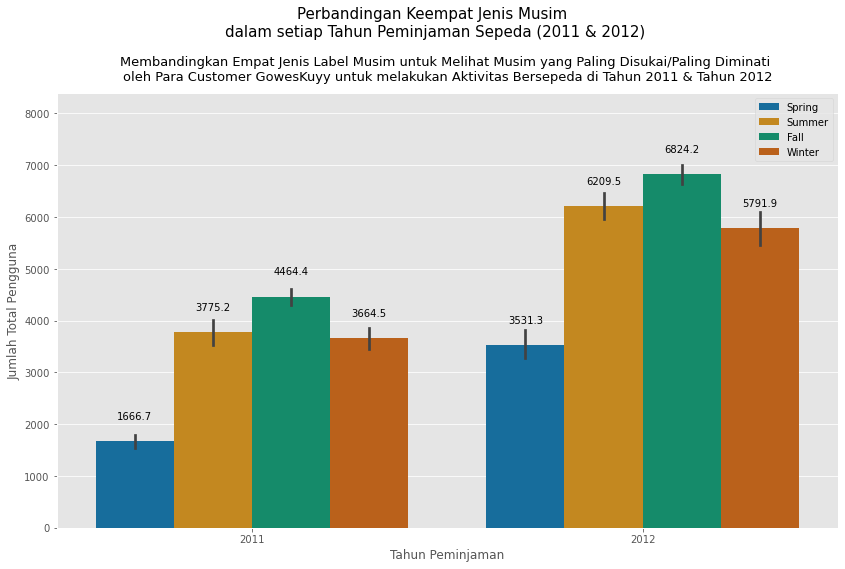

In [25]:
"""
Menampilkan perbandingan kategori dari keempat musim (fall, spring, summer dan winter)
berdasarkan jumlah total pengguna/peminjam sepeda, baik pengguna yang terdaftar (registered)
maupun pengguna yang tidak terdaftar di dalam sistem otomatis (casual) untuk tahun 2011 dan tahun 2012
"""
plt.figure(figsize=(14, 8))

ax = sns.barplot(x="Year", y="Total", hue="Season", data=df_bikesharing_per_day, palette="colorblind",
            order=df_bikesharing_per_day.groupby("Year")["Total"].sum().sort_values(ascending=True).index)
for i in ax.containers:
    ax.bar_label(i, padding=20, fmt="%.1f")
    ax.margins(y=0.2)
    
plt.suptitle("Perbandingan Keempat Jenis Musim \n"
             "dalam setiap Tahun Peminjaman Sepeda (2011 & 2012)", fontsize=15, y=1.03)
plt.title("Membandingkan Empat Jenis Label Musim untuk Melihat Musim yang Paling Disukai/Paling Diminati \n"
          "oleh Para Customer GowesKuyy untuk melakukan Aktivitas Bersepeda di Tahun 2011 & Tahun 2012", fontsize=13, pad=13)
plt.xlabel("Tahun Peminjaman")
plt.ylabel("Jumlah Total Pengguna")
plt.legend()
plt.show()

Pada pertanyaan pertama ini saya berfokus untuk menjawab sebuah pertanyaan yang saya buat sendiri objektifnya untuk menyelesaikan submission kelas Belajar Analisis Data dengan Python dari Dicoding. Pertanyaan pertama ini adalah bagaimanakah tingkat perbandingan antara tahun peminjaman sepeda (2011 & 2012) berdasarkan jumlah total keseluruhan pengguna/peminjam sepeda  pada masing-masing kaempat kategori/label musim yang dimiliki oleh atribut "Season".

Berdasarkan grafik batang diatas kita dapat mengetahui bahwasanya jika dikalkulasikan secara keseluruhan antara masing-masing jumlah total pengguna sepeda yang dimiliki oleh keempat label musim pada setiap tahun peminjaman, maka tahun 2012 merupakan tahun yang memiliki jumlah total peminjam terbanyak & tertinggi dibandingkan tahun 2011. Tetapi walaupun begitu, dari kedua tahun peminjaman tersebut, terdapat 1 persamaan yaitu musim gugur (fall/autumn season) adalah musim yang memiliki jumlah total pengguna/peminjam sepeda tertinggi diantara musim lainnya seperti musim semi (spring season), musim panas (summer season) dan musim dingin (winter season).

Jumlah pengguna/peminjam sepeda selama musim gugur di tahun 2011 berjumlah 4.464 orang sedangkan jumlah pengguna sepeda yang menggunakan jasa peminjaman sepeda selama musim gugur di tahun 2012 berjumlah 6.824 orang. Artinya jika dilihat dari jumlah tersebut, sebuah jasa yang disediakan oleh Perusahaan GowesKuyy dari sisi peminjaman sepeda mengalami trend peningkatan jumlah pengguna karena berhasil mendapatkan sebanyak 2.360 pengguna/customer baru yang sebelumnya belum pernah menggunakan/memanfaatkan jasa peminjaman sepeda dari Perusahaan GowesKuyy.

Berbicara tentang mendapatkan pengguna/customer baru dari sisi peminjaman sepeda, musim panas (summer season) berhasil mendapatkan jumlah customer baru yang paling banyak dibandingkan musim gugur dengan nilai total customer yang mencapai 2,434 pengguna. Hal tersebut dikarenakan jumlah total pengguna yang meminjam sepeda pada musim panas di tahun 2011 berjumlah 3.775 pengguna sedangkan pada tahun berikutnya (tahun 2012), jumlah total pengguna/customer yang meminjam sepeda dari Perusahaan GowesKuyy mencapai 6.209 pengguna.

### 4.2. Pertanyaan 2: Bagaimanakah Perbandingan Tingkat Frekuensi Nilai Data berdasarkan Jumlah Persentase Peminjam/Pengguna Sepeda Disaat Hari Kerja dan Hari Libur?

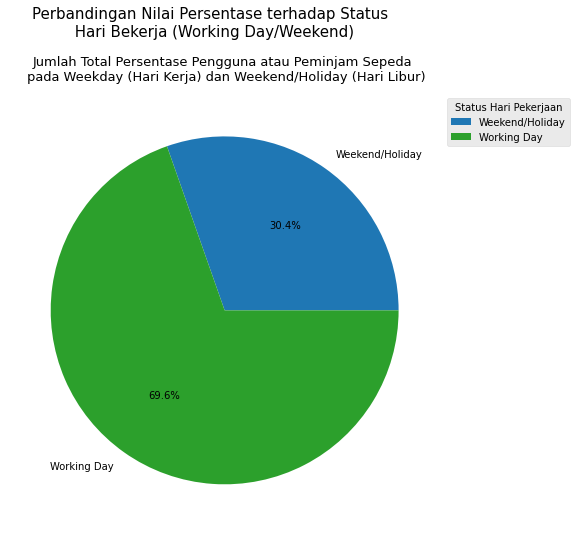

In [26]:
"""
Menampilkan persentase pengguna sepeda pada hari kerja (working day) dan hari libur (weekend)
berdasarkan jumlah total keseluruhan pengguna/peminjam sepeda, baik pengguna
sepeda yang terdaftar di dalam sistem otomatis (registered)
maupun pengguna yang tidak terdaftar di dalam sistem otomatis (casual)
"""
plt.figure(figsize=(14, 8))

percentage_working_day = df_bikesharing_per_day.groupby("Working_Day")["Total"].sum().reset_index()
plt.pie(percentage_working_day["Total"], labels = percentage_working_day["Working_Day"],
        colors=["tab:blue", "tab:green"], autopct = "%.1f%%")
plt.suptitle("Perbandingan Nilai Persentase terhadap Status \n Hari Bekerja (Working Day/Weekend)", fontsize=15, y=1.03)
plt.title("Jumlah Total Persentase Pengguna atau Peminjam Sepeda \n "
          "pada Weekday (Hari Kerja) dan Weekend/Holiday (Hari Libur)", fontsize=13, pad=13)
plt.legend(title="Status Hari Pekerjaan", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Sebagai pengantar untuk grafik pie diatas jumlah total persentasenya jika dikalkulasikan harus mencapai 100%, tidak boleh kurang dari 100% atau melebihi 100%. Pada pie chart diatas jika kita totalkan jumlah persentase yang dimiliki oleh kedua legend data, antara 69.6% + 30.4% maka akan menghasilkan nilai sebesar 100% yang itu berarti pie chart diatas sudah memenuhi persyaratan dalam proses menampilkan nilai data dengan grafik pie.

Berdasarkan grafik pie diatas dapat diketahui jika penggunaan/peminjaman sepeda lebih banyak dilakukan pada saat hari kerja (weekday) yang dimulai dari hari Senin - Jumat dengan nilai persentase yaitu 69.6%. Sedangkan peminjaman sepeda yang dilakukan pada saat hari libur/akhir pekan jumlah penggunanya tidak sebanyak pengguna yang meminjam sepeda saat hari kerja karena nilai persentase yang dihasilkan hanya berjumlah 30.4%.

Hal tersebut sudah sangat membuktikkan bahwasanya para pekerja atau bahkan pelajar sekolah serta mahasiswa/mahasiswi dalam melakukan aktivitas keberagkatan/kepulangan dari aktivitas mereka seperti bekerja/sekolah, mereka hampir selalu menaiki sepeda. Kenapa begitu? Karena dengan asumsi yang sudah saya jelaskan sebelumnya lalu jika kita selaraskan dengan informasi pada grafik pie diatas, maka dapat diketahui secara pasti bahwasanya intensitas jumlah pengguna/peminjam sepeda pada hari kerja (working day) sangat tinggi & banyak dibandingkan dengan pengguna sepeda pada hari libur kerja/sekolah. Itu berarti mayoritas background dari pengguna/peminjam sepeda berasal dari kalangan pekerja/anak sekolahan serta para mahasiswa & mahasiswi karena mayoritas aktivitas mereka dilakukan di hari Senin - Jumat yang merupakan hari bekerja (working day).

Sedangkan untuk pengguna/peminjam sepeda yang menggunakan sepeda pada saat hari libur/weekend, saya berasumsi kalau mereka hanya sekedar ingin menikmati suasana kota disaat sedang libur bekerja/bersekolah. 

### 4.3. Pertanyaan 3: Bagaimanakah Trend Data Time-Series terhadap Penggunaan/Peminjaman Sepeda yang Dilakukan oleh Kedua Jenis Customer (Customer Registered & Customer Casual) pada Periode Waktu Peminjaman berdasarkan Hari Kerja (Working Day) dan Hari Libur (Weekend/Holiday)?

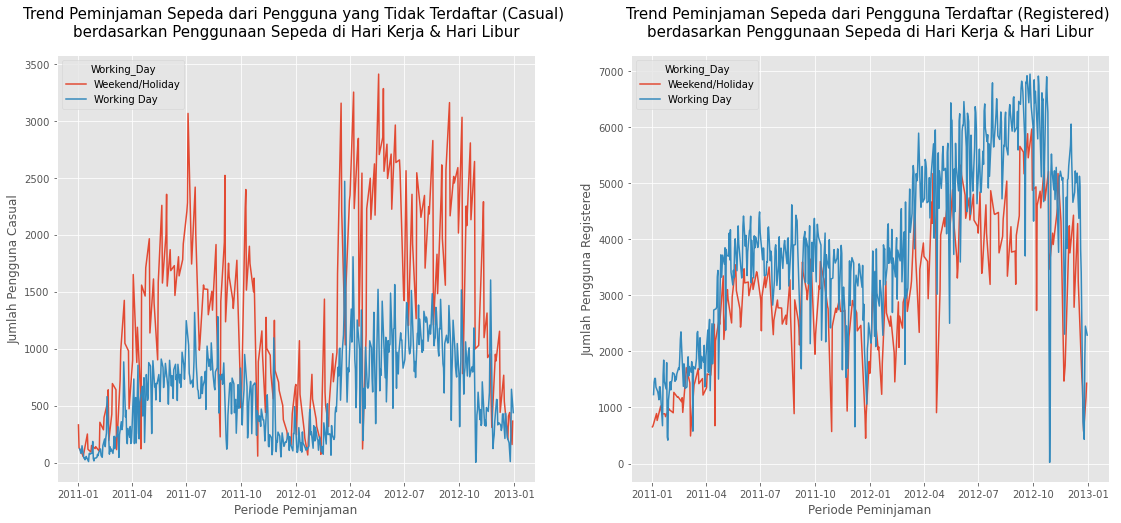

In [27]:
"""
Menampilkan trend penggunaan/peminjaman sepeda selama periode waktu peminjaman dari
tanggal 1 Januari 2011 - 31 Desember 2012 yang dilakukan oleh
customer terdaftar (registered) dan customer yang tidak terdaftar (casual)
berdasarkan status hari pekerjaan, apakah peminjaman sepeda dilakukan pada hari kerja/hari libur 
"""
plt.figure(figsize=(60, 55))

plt.subplot(6, 6, 1)
sns.lineplot(x="Rental_Date", y="Casual", hue="Working_Day", data=df_bikesharing_per_day)
plt.title("Trend Peminjaman Sepeda dari Pengguna yang Tidak Terdaftar (Casual) \n"
          "berdasarkan Penggunaan Sepeda di Hari Kerja & Hari Libur", fontsize=15, y=1.03)
plt.xlabel("Periode Peminjaman")
plt.ylabel("Jumlah Pengguna Casual")

plt.subplot(6, 6, 2)
sns.lineplot(x="Rental_Date", y="Registered", hue="Working_Day", data=df_bikesharing_per_day)
plt.title("Trend Peminjaman Sepeda dari Pengguna Terdaftar (Registered) \n"
          "berdasarkan Penggunaan Sepeda di Hari Kerja & Hari Libur", fontsize=15, y=1.03)
plt.xlabel("Periode Peminjaman")
plt.ylabel("Jumlah Pengguna Registered")
plt.show()

Hasil dari kedua line chart diatas memberikan kita informasi bahwasanya dalam periode waktu selama 2 tahun (1 Januari 2011 hingga 31 Desember 2012) selalu mengalami peningkatan jumlah pengguna secara signifikan, baik itu pengguna casual maupun pengguna yang terdaftar di dalam sistem otomatis Perusahaan GowesKuyy. Walaupun sebenarnya di dalam line chart yang menampilkan trend peminjaman sepeda untuk customer casual terdapat penurunan jumlah pengguna yang dimulai dari akhir tahun 2011 (Desember 2011) sampai meningkat kembali pada periode akhir Bulan Maret 2012. Selain itu, insight yang dapat kita ketahui selanjutnya dari line chart yang menampilkan trend peminjaman sepeda untuk pengguna casual adalah bahwasanya jumlah pengguna yang meminjam sepeda saat hari libur atau akhir pekan (weekend/holiday) ternyata jauh lebih banyak kuantitasnya daripada jumlah pengguna yang meminjam sepeda saat hari kerja/sekolah (working day). Hal tersebut dapat kita lihat secara jelas dari garis biru yang menunjukkan trend peningkatan serta penurunan jumlah penggunaan sepeda saat hari kerja.

Di samping itu, jika kita melihat trend penggunaan sepeda yang dilakukan oleh para pengguna yang terdaftar di dalam sistem (registered user) bahwasanya antara peminjaman/penggunaan sepeda saat hari kerja (Senin - Jumat) dan hari libur/akhir pekan sangat selaras antar kedua label tersebut. Tetapi walaupun begitu penggunaan sepeda saat hari kerja/sekolah masih lebih banyak penggunanya daripada penggunaan sepeda saat hari libur/pada akhir pekan walaupun selisih jumlahnya tidak kontras seperti selisih jumlah pengguna antara penggunaan sepeda pinjaman saat hari kerja & hari libur di grafik trend peminjaman sepeda untuk customer/pengguna casual.

## 5. Conclusion

Setelah melakukan proses Exploratory Data Analysis (EDA) yang cukup panjang serta juga dilakukan proses pembuatan Data Visualisasi + Explanatory serta tahapan analisis terhadap masing-masing grafik, tahap selanjutnya adalah saya akan melakukan proses pengambilan kesimpulan berdasarkan tiga grafik visulisasi yang sebelumnya telah saya buat. Berikut adalah kesimpulan dari masing-masing pertanyaan bisnis:

1. Kesimpulan pertama dari pertanyaan pertama adalah bahwasanya, baik di tahun 2011 dan tahun 2012, musim gugur (fall/autumn season) adalah musim yang memiliki jumlah total pengguna/peminjam sepeda tertinggi diantara musim lainnya seperti musim semi (spring season), musim panas (summer season) dan musim dingin (winter season). Jumlah pengguna/peminjam sepeda selama musim gugur di tahun 2011 berjumlah 4.464 orang sedangkan jumlah pengguna sepeda yang menggunakan jasa peminjaman sepeda selama musim gugur di tahun 2012 berjumlah 6.824 orang. Artinya jika dilihat dari jumlah tersebut, sebuah jasa yang disediakan oleh Perusahaan GowesKuyy dari sisi peminjaman sepeda mengalami trend peningkatan jumlah pengguna karena berhasil mendapatkan sebanyak 2.360 pengguna/customer baru yang sebelumnya belum pernah menggunakan/memanfaatkan jasa peminjaman sepeda dari Perusahaan GowesKuyy.

2. Kesimpulan kedua dari pertanyaan kedua yang saya buat sendiri adalah penggunaan/peminjaman sepeda lebih banyak dilakukan pada saat hari kerja (weekday) yang dimulai dari hari Senin - Jumat dengan nilai persentase yaitu 69.6%. Sedangkan peminjaman sepeda yang dilakukan pada saat hari libur/akhir pekan jumlah penggunanya tidak sebanyak pengguna yang meminjam sepeda saat hari kerja karena nilai persentase yang dihasilkan hanya berjumlah 30.4%. Hal tersebut membuktikkan bahwasanya para pekerja atau bahkan pelajar sekolah serta mahasiswa/mahasiswi dalam melakukan aktivitas keberagkatan/kepulangan dari aktivitas mereka seperti bekerja/sekolah, mereka hampir selalu menaiki sepeda. Hal tersebut dikarenakan bahwasanya jumlah pengguna/peminjam sepeda selama hari kerja (working day) memiliki banyak pengguna dibandingkan dengan pengguna sepeda selama hari libur kerja/sekolah. Itu berarti mayoritas background dari pengguna/peminjam sepeda berasal dari kalangan pekerja/anak sekolahan serta para mahasiswa & mahasiswi karena mayoritas aktivitas mereka dilakukan di hari Senin - Jumat yang merupakan hari bekerja (working day).

3. Kesimpulan terakhir dari pertanyaan ketiga pada projek submission ini adalah bahwasanya selama periode waktu 2 tahun (1 Januari 2011 hingga 31 Desember 2012), jumlah penggunaan sepeda mengalami peningkatan secara signifikan, baik itu pengguna casual maupun pengguna yang terdaftar. Walaupun sebenarnya di dalam line chart yang menampilkan trend peminjaman sepeda untuk pengguna casual terdapat penurunan jumlah pengguna yang dimulai dari akhir tahun 2011 (Desember 2011) sampai kemudian meningkat kembali pada periode akhir Bulan Maret 2012. Selain itu, insight yang dapat kita ketahui selanjutnya dari line chart yang menampilkan trend peminjaman sepeda untuk pengguna casual adalah bahwasanya jumlah pengguna yang meminjam sepeda saat hari libur atau akhir pekan (weekend/holiday) ternyata jauh lebih banyak kuantitasnya daripada jumlah pengguna yang meminjam sepeda saat hari kerja/sekolah (working day). Di samping itu, jika kita melihat trend penggunaan sepeda yang dilakukan oleh para pengguna yang terdaftar bahwasanya antara penggunaan sepeda saat hari kerja (Senin - Jumat) dan hari libur/akhir pekan sangat selaras antar kedua label tersebut. Tetapi walaupun begitu penggunaan sepeda saat hari kerja/sekolah masih lebih banyak penggunanya daripada penggunaan sepeda saat hari libur/pada akhir pekan walaupun selisih jumlahnya tidak kontras seperti selisih jumlah pengguna antara penggunaan sepeda pinjaman saat hari kerja & hari libur di grafik trend peminjaman sepeda untuk customer/pengguna casual.